In [1]:
#First of all, let's import all required Python Libraries which are required for analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the source file (Raw data having Air Quality Sample values)
dt= pd.read_csv("./AirQualityUCI.csv")

In [3]:
#Glimpse of dataset by selecting top 5 rows 
dt.head(5)
#Assign a new dataframe for calculation just as a safe side
df=dt
#See top 5 rows to understand how data looks like 
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
# Below section of code will rename the columns for better readability 

df = df.rename(columns={
                        'CO(GT)' : 'CarbonMonoxide',
                        'PT08.S1(CO)' : 'TinOxide', 
                        'NMHC(GT)' : 'NonMetalicHydrocarbon', 
                        'C6H6(GT)' : 'Benzene',  
                        'PT08.S2(NMHC)' : 'Titania', 
                        'NOx(GT)' : 'NitrogenOxide', 
                        'PT08.S3(NOx)' : 'TungstenOxideNOx', 
                        'NO2(GT)' : 'NitrogenDioxide', 
                        'PT08.S4(NO2)' : 'TungstenOxideNO2', 
                        'PT08.S5(O3)' : 'IndiumOxide', 
                        'T' : 'Temperature', 
                        'RH' : 'RelativeHumidity', 
                        'AH' : 'AbsoluteHumidity'    
                       })

In [5]:
#Check the column names after change
df.columns


Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [6]:
#See top 5 rows to understand how data looks like after changing column names
df.head(5)

,Date,Time,CarbonMonoxide,TinOxide,NonMetalicHydrocarbon,Benzene,Titania,NitrogenOxide,TungstenOxideNOx,NitrogenDioxide,TungstenOxideNO2,IndiumOxide,Temperature,RelativeHumidity,AbsoluteHumidity
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [7]:
# This dataset is having -200 as null values so we will replace -200 with null values and drop all null values 
df[df == -200]=np.NAN

In [8]:
# Considering we dont have any business logic to fill null/dirty values we will drop them as of now 
df=df.dropna()

In [9]:
# Let's see how much good data we have 
df.shape

(827, 15)

In [10]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

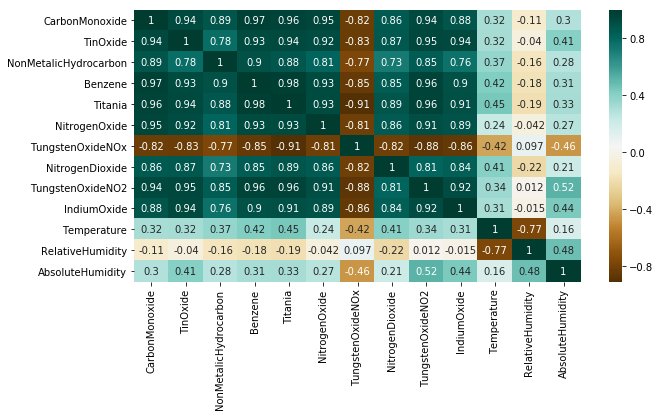

In [11]:
# Time to visualise correlation by heatmap and understand the feature importance
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [12]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

**********************************


Based on the visualisation shown in AirQuality_LinearRegression we identified some of good features

***************************************

In [13]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

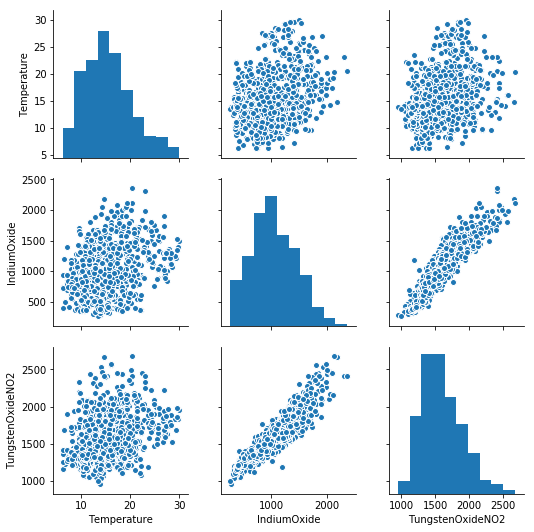

In [14]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [15]:
df.columns

Index(['Date', 'Time', 'CarbonMonoxide', 'TinOxide', 'NonMetalicHydrocarbon',
       'Benzene', 'Titania', 'NitrogenOxide', 'TungstenOxideNOx',
       'NitrogenDioxide', 'TungstenOxideNO2', 'IndiumOxide', 'Temperature',
       'RelativeHumidity', 'AbsoluteHumidity'],
      dtype='object')

In [16]:
features=['Temperature','IndiumOxide','TungstenOxideNO2']
X=df[features]
y=df['RelativeHumidity']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_test.head(2)

(578, 3)
(249, 3)
(578,)
(249,)


,Temperature,IndiumOxide,TungstenOxideNO2
389,9.9,644.0,1258.0
888,14.0,1385.0,2083.0


In [18]:
y_test.head(2)

389    50.2
888    76.3
Name: RelativeHumidity, dtype: float64

********************************************

Let's scale  our data

********************************************

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)





********************************************

Lets' find RMSE for multiple KNN models and check their RMSE 

********************************************

In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.704635997262208
RMSE value for k=  2 is: 8.818956057480676
RMSE value for k=  3 is: 8.171521383042496
RMSE value for k=  4 is: 7.963476491540946
RMSE value for k=  5 is: 7.811618779216458
RMSE value for k=  6 is: 7.731697522947039
RMSE value for k=  7 is: 7.781182235615214
RMSE value for k=  8 is: 7.7216068014620864
RMSE value for k=  9 is: 7.674491444391684
RMSE value for k=  10 is: 7.705034576906537
RMSE value for k=  11 is: 7.746331777846833
RMSE value for k=  12 is: 7.784618579190098
RMSE value for k=  13 is: 7.794674352815423
RMSE value for k=  14 is: 7.826982587281307
RMSE value for k=  15 is: 7.828457441731502
RMSE value for k=  16 is: 7.859153971138896
RMSE value for k=  17 is: 7.871202556504571
RMSE value for k=  18 is: 7.918630810777705
RMSE value for k=  19 is: 8.013220172819086
RMSE value for k=  20 is: 8.048725041843383


********************************************

Based on above results we can see for K = 6 , we have minimum RMSE ( Root Mean Square Error) seems a good choice

Let's plot Elbow curve to visualise optimum K value<br><br>

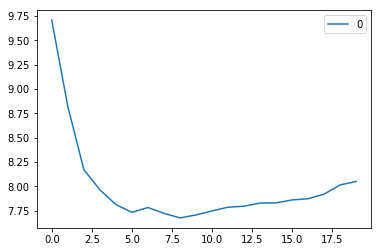

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [22]:
#Let's predict
predict = model.predict(X_test)


In [23]:
predict

array([61.27 , 60.78 , 43.505, 25.925, 42.725, 67.245, 26.13 , 46.38 ,
       48.045, 61.025, 59.74 , 50.19 , 38.855, 49.065, 30.605, 44.48 ,
       59.505, 68.945, 65.   , 66.39 , 43.855, 70.035, 49.6  , 63.625,
       57.305, 46.985, 33.62 , 31.195, 45.98 , 40.095, 30.015, 24.355,
       62.425, 44.485, 31.175, 43.535, 59.82 , 60.57 , 28.805, 65.695,
       61.825, 61.455, 62.075, 39.685, 53.72 , 59.86 , 62.02 , 48.335,
       28.84 , 53.92 , 26.78 , 48.53 , 53.58 , 57.8  , 47.185, 41.71 ,
       27.97 , 51.7  , 57.245, 32.12 , 65.425, 36.235, 45.72 , 68.395,
       52.66 , 54.21 , 27.345, 51.42 , 64.835, 59.91 , 61.925, 59.635,
       49.525, 63.435, 62.48 , 63.665, 58.47 , 58.875, 36.22 , 61.375,
       52.41 , 48.49 , 46.71 , 57.13 , 63.185, 45.685, 48.745, 49.31 ,
       64.77 , 51.32 , 48.045, 54.29 , 34.22 , 64.535, 48.885, 41.415,
       59.335, 58.92 , 24.355, 34.955, 65.36 , 36.795, 25.8  , 64.435,
       58.34 , 27.63 , 59.85 , 39.685, 68.09 , 44.51 , 40.715, 33.925,
      

In [24]:
#model.score(y_test,predict)
y_test.shape

(249,)

In [25]:
predict.shape

(249,)

## we can use Gridsearchcv as well to identify the optimum model values

In [26]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 6}

In [27]:
model.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>